In [1]:
from vierlinden.config import model_output_path
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper
from vierlinden.model.model import NHiTSPredictionWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE

seed = 42

context_length = 50
prediction_length = 10
batch_size = 32
num_workers = 18

def main(arg : str):
    dp = VierlindenDataProcessor()
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, arg)
    
    training_df, test_df = dp.split_data(df)
    
    nhits_wrapper = NHiTSTrainingWrapper(training_df, 
                                         target_col = arg, 
                                         context_length = context_length, 
                                         prediction_length = prediction_length,
                                         batch_size = batch_size, 
                                         num_workers = num_workers)
    optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)
    
    print(f"Optimal learning rate for {arg}: {optimal_lr}")
    
    best_model = nhits_wrapper.train(optimal_lr, seed = seed)
    
    return nhits_wrapper, test_df

/storage/.venv/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


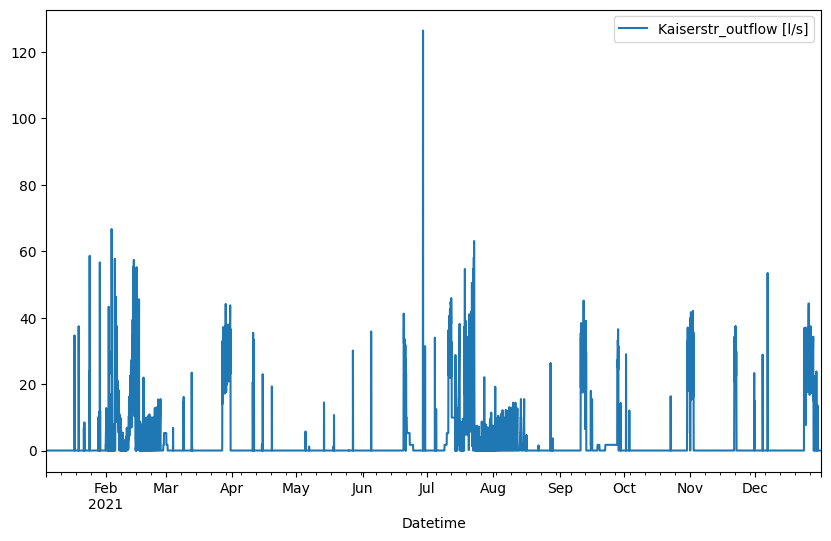

In [2]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kaiserstr_outflow [l/s]')
dp.plot_target_col('Kaiserstr_outflow [l/s]')

In [3]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kaiserstr_outflow [l/s]')

training_df, test_df = VierlindenDataProcessor.split_data(df, train_frac=0.9)
test_df.shape

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


(868, 24)

In [4]:
nhits_wrapper, test_df = main('Kaiserstr_outflow [l/s]')
nhits_wrapper.save_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model.pt')

model = nhits_wrapper.best_model

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden


INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Finding best initial lr: 100%|██████████| 100/100 [00:01<00:00, 79.58it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.


Optimal learning rate for Kaiserstr_outflow [l/s]: 5.623413251903491e-05



  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | MAE            | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 193/193 [00:25<00:00,  7.64it/s, v_num=0, train_loss_step=3.110, val_loss=1.300, train_loss_epoch=2.300]

Metric val_loss improved. New best score: 1.299


Epoch 1: 100%|██████████| 193/193 [00:23<00:00,  8.28it/s, v_num=0, train_loss_step=2.410, val_loss=1.270, train_loss_epoch=2.250]

Metric val_loss improved by 0.026 >= min_delta = 0.0001. New best score: 1.274


Epoch 2: 100%|██████████| 193/193 [00:24<00:00,  7.98it/s, v_num=0, train_loss_step=3.900, val_loss=1.250, train_loss_epoch=2.210]

Metric val_loss improved by 0.020 >= min_delta = 0.0001. New best score: 1.253


Epoch 3: 100%|██████████| 193/193 [00:23<00:00,  8.16it/s, v_num=0, train_loss_step=2.620, val_loss=1.240, train_loss_epoch=2.180]

Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 1.243


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=2.620, val_loss=1.240, train_loss_epoch=2.180]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 5: 100%|██████████| 193/193 [00:25<00:00,  7.55it/s, v_num=0, train_loss_step=1.430, val_loss=1.240, train_loss_epoch=2.150]

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 1.242


Epoch 7: 100%|██████████| 193/193 [00:23<00:00,  8.25it/s, v_num=0, train_loss_step=3.400, val_loss=1.240, train_loss_epoch=2.130]

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 1.239


Epoch 17: 100%|██████████| 193/193 [00:27<00:00,  7.09it/s, v_num=0, train_loss_step=1.280, val_loss=1.250, train_loss_epoch=2.050]

Monitored metric val_loss did not improve in the last 10 records. Best score: 1.239. Signaling Trainer to stop.


Epoch 17: 100%|██████████| 193/193 [00:27<00:00,  7.03it/s, v_num=0, train_loss_step=1.280, val_loss=1.250, train_loss_epoch=2.050]


INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


[2.2954366207122803, 2.246906280517578, 2.2115819454193115, 2.1785664558410645, 2.1721386909484863, 2.1545472145080566, 2.144773244857788, 2.1252739429473877, 2.112143039703369, 2.11161208152771, 2.0953924655914307, 2.0934038162231445, 2.075566530227661, 2.0622191429138184, 2.0619781017303467, 2.0549051761627197, 2.0480616092681885, 2.04669189453125]
[1.2992075681686401, 1.2736382484436035, 1.2532308101654053, 1.243140459060669, 1.2436712980270386, 1.2415790557861328, 1.244357705116272, 1.2390111684799194, 1.2448880672454834, 1.2423036098480225, 1.2470675706863403, 1.2453100681304932, 1.2490915060043335, 1.2431029081344604, 1.245761513710022, 1.2495837211608887, 1.2435625791549683, 1.2487207651138306]


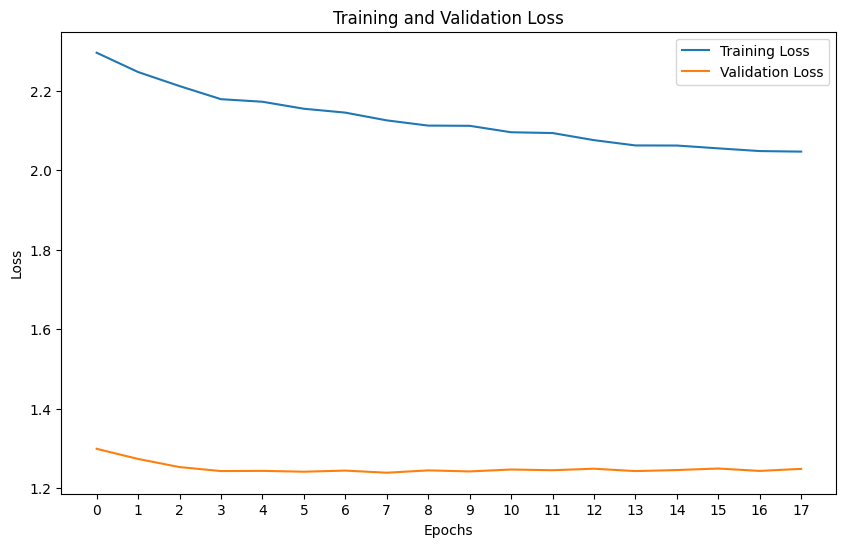

In [5]:
print(nhits_wrapper.metrics_callback.metrics["train_loss"])
print(nhits_wrapper.metrics_callback.metrics["val_loss"])

nhits_wrapper.plot_training_result()

In [ ]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model.pt')

In [6]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kaiserstr_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


In [7]:
prediction_df

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kaiserstr_outflow [l/s],Predicted Forecast
0,2021-11-25 20:00:00,100.0,9.500000,7.184615,12.788235,7.177778,74.677419,35.0,1.451613,0.0,...,0.0,0.000000,90.333333,0.000000,0.0,1.0,0.0,0.64,0.0,NaN
1,2021-11-25 21:00:00,100.0,8.500000,6.507937,10.924051,5.270588,74.950000,35.0,1.616667,0.0,...,0.0,0.666667,95.125000,0.000000,0.0,1.0,0.0,0.64,0.0,NaN
2,2021-11-25 22:00:00,100.0,8.611111,6.062500,10.779221,7.939759,75.603448,35.0,1.568966,0.0,...,0.0,0.000000,90.222222,2.903226,0.0,1.0,0.0,0.64,0.0,NaN
3,2021-11-25 23:00:00,100.0,11.095890,7.512821,18.578947,13.505495,74.767857,35.0,1.285714,0.0,...,0.0,0.000000,85.569231,0.000000,0.0,1.0,0.0,0.64,0.0,NaN
4,2021-11-26 00:00:00,100.0,7.281690,4.843750,7.418919,5.729412,75.661017,35.0,1.118644,0.0,...,0.0,0.000000,88.522388,0.000000,0.0,1.0,0.0,0.64,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2021-12-31 19:00:00,99.0,9.859155,6.147541,9.347222,12.800000,75.033333,35.0,1.700000,0.0,...,0.0,0.000000,95.476923,0.000000,0.0,1.0,0.0,1.06,0.0,"[-0.10243117809295654, -0.26760852336883545, -..."
864,2021-12-31 20:00:00,99.0,9.111111,5.823529,7.970588,11.211268,76.000000,35.0,1.300000,0.0,...,0.0,0.580645,90.275000,3.064516,0.0,1.0,0.0,1.06,0.0,"[0.05727744102478027, -0.22455298900604248, -0..."
865,2021-12-31 21:00:00,99.0,11.652778,7.544118,16.804878,17.802326,74.250000,35.0,1.600000,0.0,...,0.0,0.000000,85.187500,0.000000,0.0,1.0,0.0,1.06,0.0,"[0.06013208627700806, -0.025286614894866943, 0..."
866,2021-12-31 22:00:00,99.0,8.338028,5.287671,7.107692,9.878788,76.200000,35.0,1.233333,0.0,...,0.0,0.000000,88.462687,0.000000,0.0,1.0,0.0,1.06,0.0,"[-0.13893425464630127, -0.08809554576873779, -..."


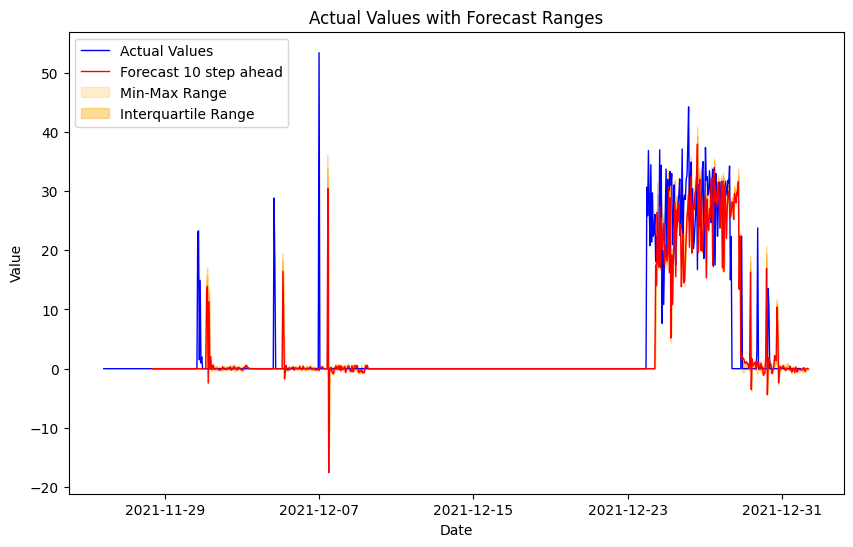

In [8]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=10, plot_forecast_distribution=True)

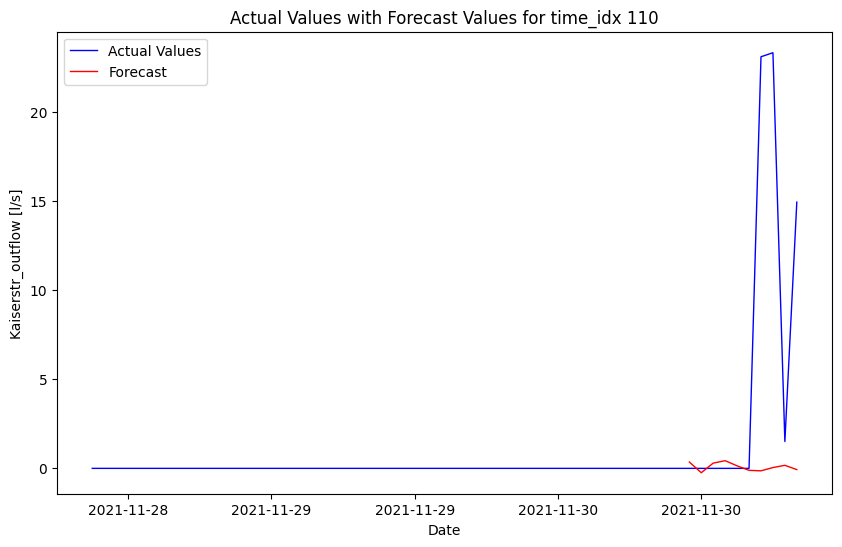

In [11]:
prediction_wrapper.plot_forecast_per_time_idx(110)

In [12]:
print(model)

NHiTS(
  	"activation":                        ReLU
  	"backcast_loss_ratio":               1.0
  	"batch_normalization":               False
  	"categorical_groups":                {}
  	"context_length":                    50
  	"downsample_frequencies":            [8, 2, 1]
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_size":                       512
  	"initialization":                    lecun_normal
  	"interpolation_mode":                linear
  	"learning_rate":                     0.00012589254117941672
  	"log_gradient_flow":                 False
  	"log_interval":                      5
  	"log_val_interval":                  1
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                              MAE()
  	"monotone_constaints"